In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load your historical inventory data (for simplicity, we use random data here)
# Assume we have daily sales data for the last 2 years
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
sales_data = np.random.randint(100, 500, size=(len(date_rng),))  # Simulated sales data

In [2]:
# Create a DataFrame with date and sales data
data = pd.DataFrame({'ds': date_rng, 'y': sales_data})

In [3]:
# 2. Prepare the data for Prophet model (Prophet expects columns 'ds' for date and 'y' for the target)
# This is the structure Prophet needs, so make sure to format it correctly

# 3. Train Prophet model for demand forecasting
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp13xfholc/019g08zo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp13xfholc/d6qrqt20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3307', 'data', 'file=/tmp/tmp13xfholc/019g08zo.json', 'init=/tmp/tmp13xfholc/d6qrqt20.json', 'output', 'file=/tmp/tmp13xfholc/prophet_modelna03zdj1/prophet_model-20241212082927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
# 4. Make future predictions (let's predict for the next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

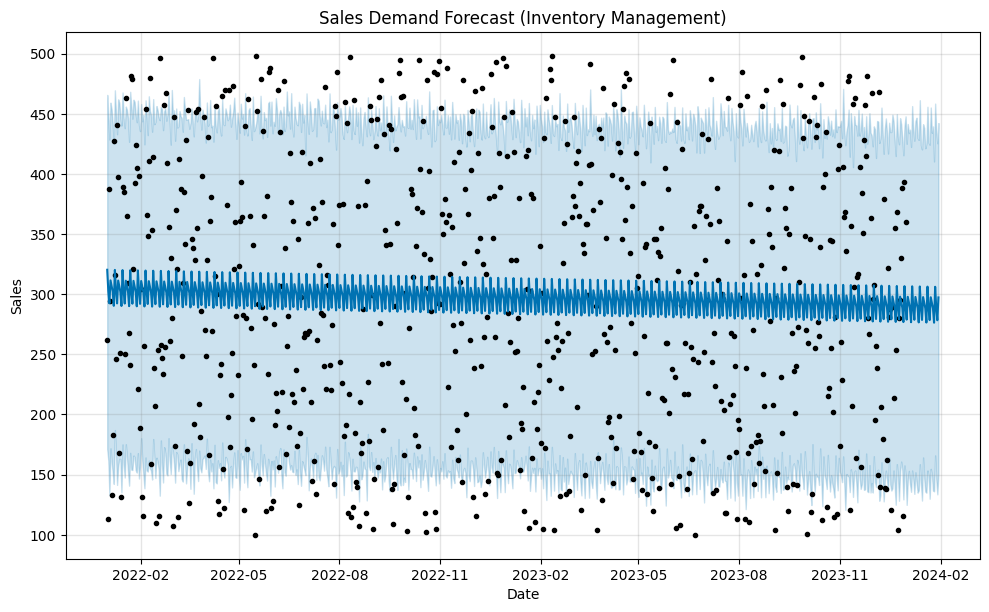

In [5]:
# 5. Visualize the forecast
fig = model.plot(forecast)
plt.title('Sales Demand Forecast (Inventory Management)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [6]:
# 6. Calculate optimal inventory levels for the next 30 days based on forecasted demand
forecasted_demand = forecast[['ds', 'yhat']].tail(30)  # Predicted demand for the next 30 days

In [7]:
# Assuming a simple replenishment rule: keep a safety stock of 10% of the predicted demand
safety_stock = 0.10 * forecasted_demand['yhat']

In [8]:
# Calculate the required inventory level (predicted demand + safety stock)
forecasted_demand['optimal_inventory'] = forecasted_demand['yhat'] + safety_stock

In [9]:
# Show the forecasted demand and calculated optimal inventory levels
print(forecasted_demand[['ds', 'yhat', 'optimal_inventory']])

            ds        yhat  optimal_inventory
730 2024-01-01  278.838662         306.722529
731 2024-01-02  297.817845         327.599630
732 2024-01-03  293.036175         322.339792
733 2024-01-04  288.600673         317.460740
734 2024-01-05  276.674406         304.341847
735 2024-01-06  306.514034         337.165437
736 2024-01-07  288.815164         317.696680
737 2024-01-08  278.707627         306.578389
738 2024-01-09  297.686810         327.455491
739 2024-01-10  292.905139         322.195653
740 2024-01-11  288.469637         317.316601
741 2024-01-12  276.543371         304.197708
742 2024-01-13  306.382998         337.021298
743 2024-01-14  288.684128         317.552541
744 2024-01-15  278.576591         306.434250
745 2024-01-16  297.555774         327.311351
746 2024-01-17  292.774103         322.051513
747 2024-01-18  288.338601         317.172461
748 2024-01-19  276.412335         304.053568
749 2024-01-20  306.251962         336.877158
750 2024-01-21  288.553092        

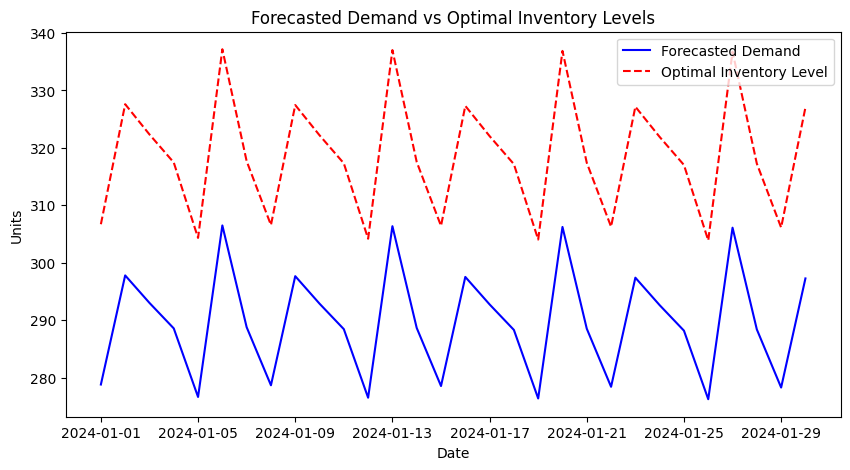

In [10]:
# Optional: Visualize the forecasted demand and optimal inventory levels
plt.figure(figsize=(10, 5))
plt.plot(forecasted_demand['ds'], forecasted_demand['yhat'], label='Forecasted Demand', color='blue')
plt.plot(forecasted_demand['ds'], forecasted_demand['optimal_inventory'], label='Optimal Inventory Level', color='red', linestyle='--')
plt.title('Forecasted Demand vs Optimal Inventory Levels')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.show()